## Libraries used

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
plt.style.use("dark_background")

## Data cleaning

In [202]:
df = pd.read_excel('/Users/fernandoseguias/Desktop/ferseg/Proyectos/Programacion/iron_hack/ironhack_labs/ccm_classification/creditcardmarketing.xlsx')
#rename columns
columns = df.columns
columns_new = []
for i in columns:
    i = i.replace(' ', '_').replace('#', 'num').lower()
    columns_new.append(i.lower())
df.columns = columns_new
#drop id customer column
df.drop('customer_number', axis=1, inplace=True)
#substitute nan values with knn imputer
columns_null = df.columns[df.isnull().any()].tolist()
df_null = df[columns_null]
df_null.isnull().sum()
imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(df_null)
num_knn= imputerKNN.transform(df_null)
df_knn_imputer = pd.DataFrame(num_knn, columns = df_null.columns)
df.drop(df_knn_imputer, axis = 1, inplace = True)
df[columns_null] = df_knn_imputer[columns_null]
#dtypes of columns int or categorical
columns_num = df.select_dtypes(include = np.number).columns
columnas_cat = df.select_dtypes(include = "object").columns
df[columnas_cat] = df[columnas_cat].apply(lambda x: x.astype('category'))
df[columns_num] = df[columns_num].apply(lambda x: x.round(0))
df[columns_num] = df[columns_num].apply(lambda x: x.astype('int64'))
df.sample(5)

,offer_accepted,reward,mailer_type,income_level,num_bank_accounts_open,overdraft_protection,credit_rating,num_credit_cards_held,num_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
16889,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,3,No,1108,761,850,2179,644
7938,No,Points,Postcard,Medium,1,No,Low,3,1,3,Yes,1183,1971,1113,962,685
14480,No,Points,Postcard,High,1,No,High,2,1,2,Yes,258,482,63,96,390
13541,No,Points,Postcard,Low,1,No,High,1,1,3,Yes,1051,1744,973,845,643
9487,No,Cash Back,Letter,Low,3,No,High,3,1,4,Yes,1103,688,1071,2021,632


## Exploratory

In [203]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_accepted,18000,2,No,16977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reward,18000,3,Air Miles,6061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mailer_type,18000,2,Postcard,9147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income_level,18000,3,Medium,9013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_bank_accounts_open,18000.0,NaN,NaN,NaN,1.255778,0.472501,1.0,1.0,1.0,1.0,3.0
overdraft_protection,18000,2,No,15322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_rating,18000,3,High,6071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_credit_cards_held,18000.0,NaN,NaN,NaN,1.9035,0.797009,1.0,1.0,2.0,2.0,4.0
num_homes_owned,18000.0,NaN,NaN,NaN,1.203444,0.427341,1.0,1.0,1.0,1.0,3.0
household_size,18000.0,NaN,NaN,NaN,3.499056,1.114182,1.0,3.0,3.0,4.0,9.0


In [ ]:
df.offer_accepted.value_counts()

In [ ]:
df.num_homes_owned.value_counts()

In [ ]:
df.own_your_home.value_counts()

In [ ]:
df.reward.value_counts()

In [ ]:
df.mailer_type.value_counts()

In [ ]:
df.household_size.value_counts()

In [ ]:
df.credit_rating.value_counts()

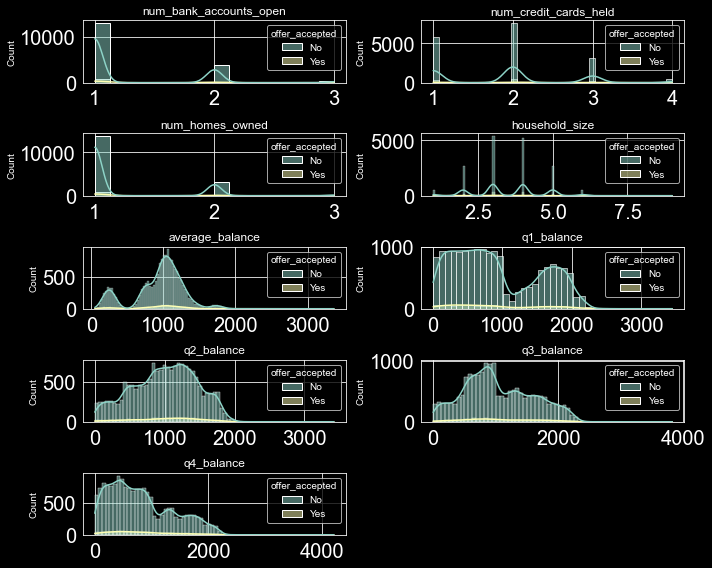

In [204]:
fig, axes = plt.subplots(5, 2, figsize = (10,8))
axes = axes.flat
for i, c in enumerate(columns_num): 
    sns.histplot(data = df, x = c, hue = "offer_accepted", ax = axes[i], kde=True)    
    axes[i].set_title(c)
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    fig.tight_layout()
fig.delaxes(axes[9]);

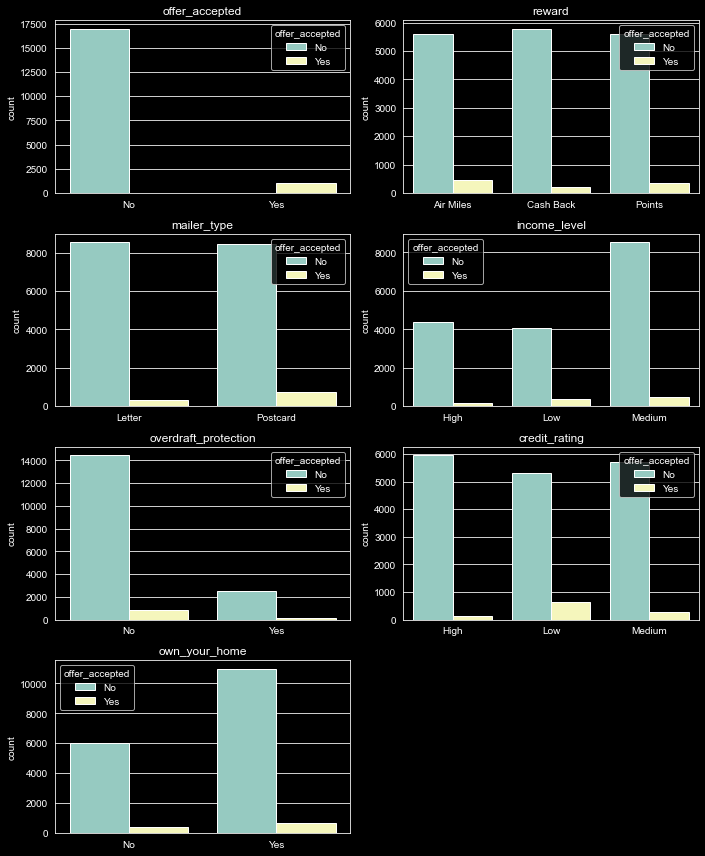

In [205]:
fig, axes = plt.subplots(4, 2, figsize = (10,12))
axes = axes.flat
for i, c in enumerate(columnas_cat): 
    sns.countplot(data = df, x = c, hue = "offer_accepted", ax = axes[i])
    axes[i].set_title(c)
    axes[i].set_xlabel("")
    fig.tight_layout()
fig.delaxes(axes[7]);

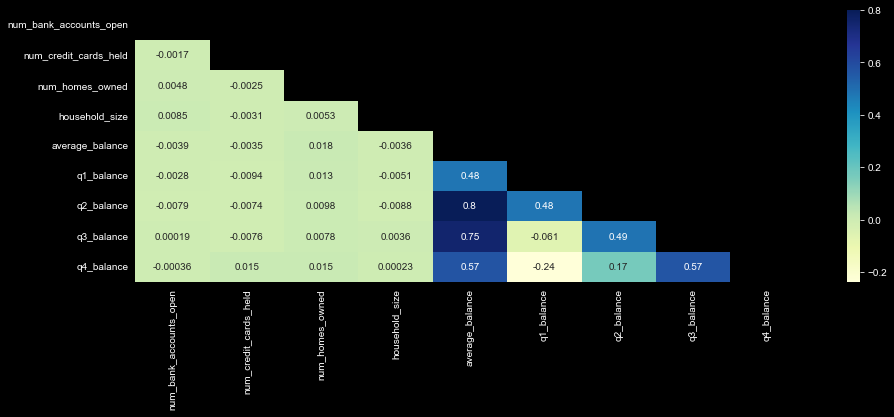

In [211]:
fig, axes = plt.subplots(figsize = (15, 5))
mask = np.triu(np.ones_like(df[columns_num].corr(), dtype = np.bool))
sns.heatmap(df[columns_num].corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

## Outliers

In [217]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_bank_accounts_open,18000.0,1.255778,0.472501,1.0,1.00,1.0,1.00,3.0
num_credit_cards_held,18000.0,1.903500,0.797009,1.0,1.00,2.0,2.00,4.0
num_homes_owned,18000.0,1.203444,0.427341,1.0,1.00,1.0,1.00,3.0
household_size,18000.0,3.499056,1.114182,1.0,3.00,3.0,4.00,9.0
average_balance,18000.0,940.513389,350.061429,48.0,788.00,1006.0,1152.25,3366.0
q1_balance,18000.0,910.450056,619.663515,0.0,393.00,773.0,1520.25,3450.0
q2_balance,18000.0,999.391667,457.097215,0.0,664.00,1032.0,1342.00,3421.0
q3_balance,18000.0,1042.033556,553.083487,0.0,633.00,946.0,1462.00,3823.0
q4_balance,18000.0,810.185556,558.628553,0.0,363.75,704.0,1211.00,4215.0


In [218]:
df.loc[df.num_bank_accounts_open > 1]

,offer_accepted,reward,mailer_type,income_level,num_bank_accounts_open,overdraft_protection,credit_rating,num_credit_cards_held,num_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276,367,352,145,242
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219,1578,1760,1119,419
9,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974,1814,1454,514,115
14,No,Air Miles,Letter,Low,2,No,High,3,1,3,Yes,1013,1819,901,854,479
16,No,Points,Postcard,Low,2,No,Medium,1,1,4,Yes,1217,567,1161,966,2174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,No,Air Miles,Letter,Medium,3,No,High,1,1,5,Yes,296,81,251,460,393
17965,No,Air Miles,Postcard,Medium,2,No,High,2,2,4,Yes,995,995,819,1147,1019
17968,No,Points,Postcard,Low,2,No,High,3,1,3,Yes,1116,443,1218,1230,1574
17981,No,Cash Back,Letter,Low,2,Yes,Medium,2,1,2,Yes,1016,360,810,1537,1358


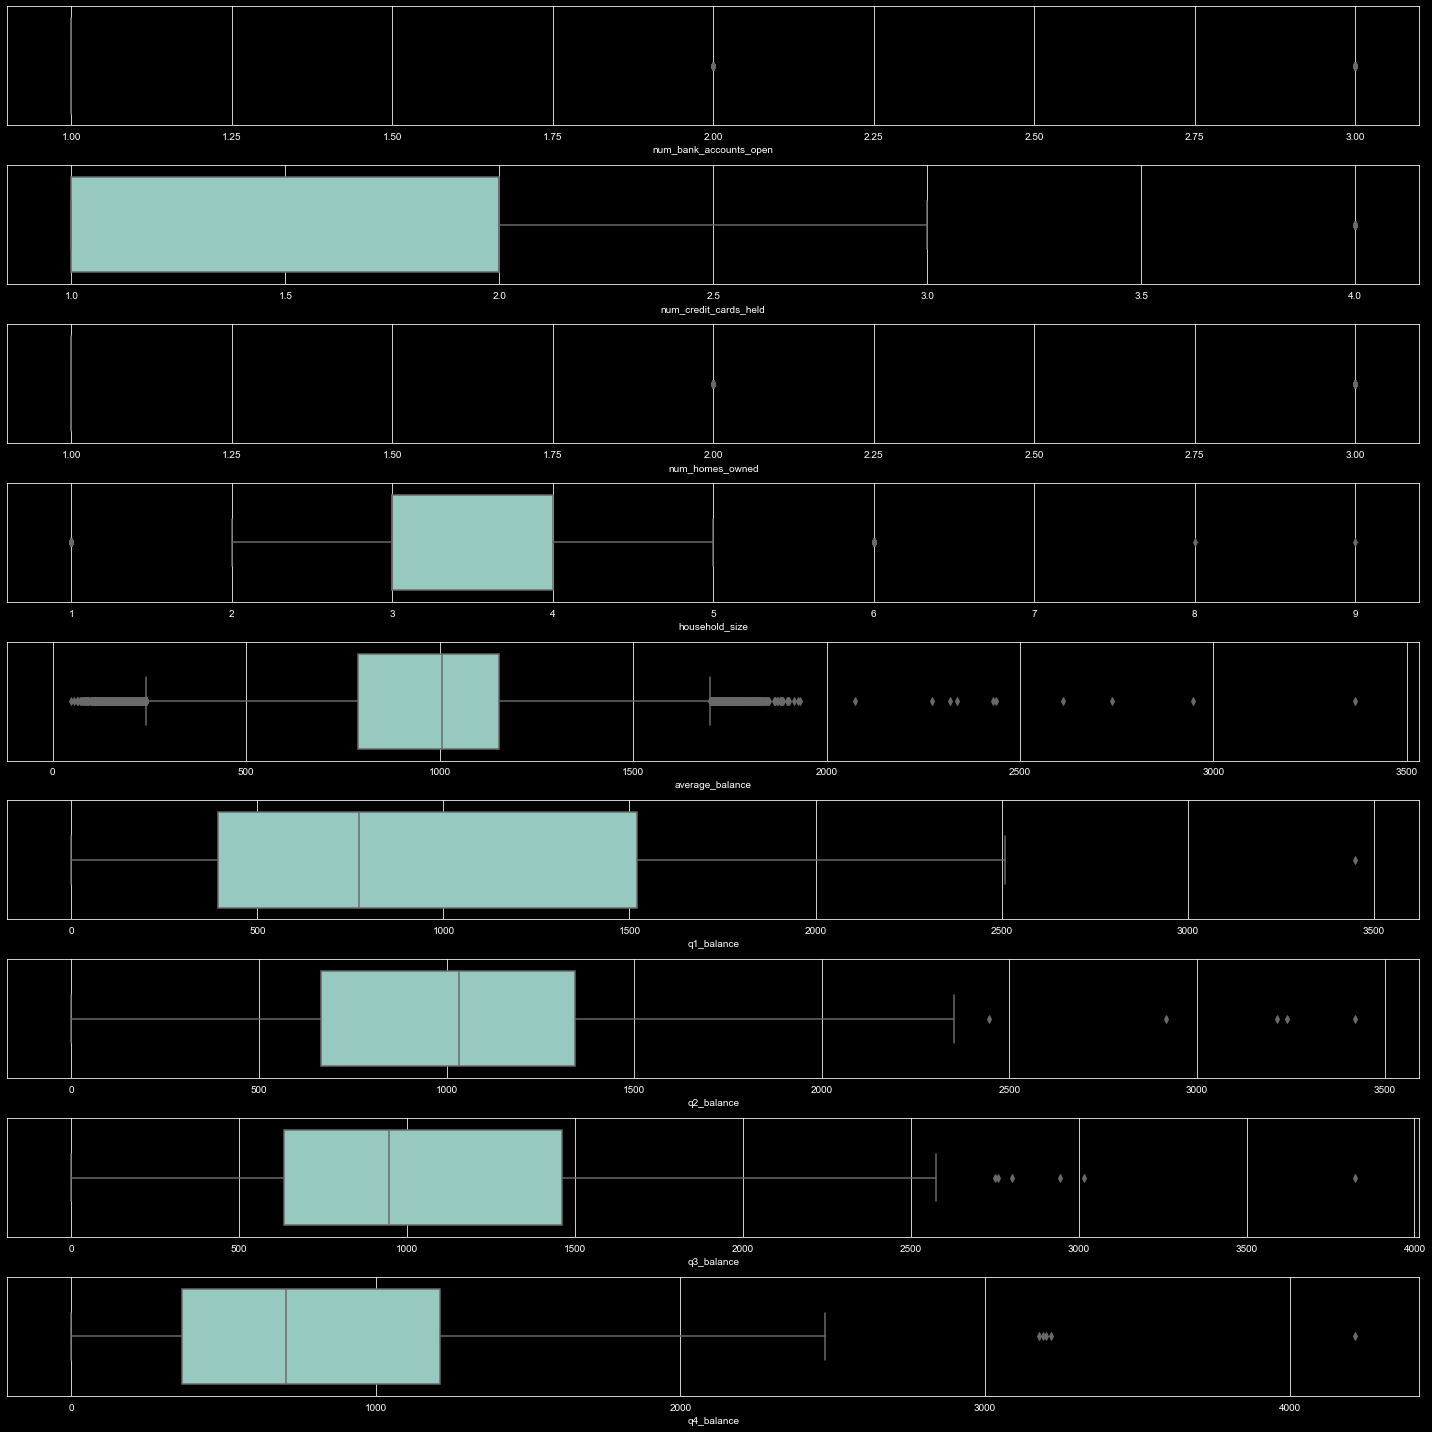

In [216]:
fig, axes = plt.subplots(9, 1, figsize=(20,20))

for i in range(len(df[columns_num].columns)):
    sns.boxplot(x=df[columns_num].columns[i], data=df[columns_num], ax=axes[i])
    plt.tight_layout()
plt.show();

## Unbalanced data management

In [207]:
data_balance = pd.DataFrame(df.offer_accepted.value_counts()) #unbalanced data sample
data_balance['percentage'] = data_balance['offer_accepted']/data_balance['offer_accepted'].sum()
data_balance

,offer_accepted,percentage
No,16977,0.943167
Yes,1023,0.056833
